In [1]:
import torch
from torch import Tensor
import IPython
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from models_def import BetaVAE, ControlVAE, plot, plot_comparison

22:18:41 models_def.py has been imported successfully!


In [3]:
# save model
import pickle
def save_model(trained_model):
    model_arch = trained_model._type()
    model_param = trained_model.param
    model_name = f'{model_arch} {model_param}'
    with open(f'Model-'+model_name+'.py', 'wb') as file:
        #pickle.dump(, open(filename, 'wb'))
        pickle.dump(trained_model, file)

# Define-Train-Save Models

In [4]:
import torch
torch.manual_seed(0)
model1 = BetaVAE(1).train()

epoch: 1/200 batch: #1 beta: 1.0000   kl= 0.0202 RL= 545.8032
epoch: 2/200 batch: #1 beta: 1.0000   kl= 5.3786 RL= 165.6163
epoch: 3/200 batch: #1 beta: 1.0000   kl= 5.5107 RL= 150.2099
epoch: 4/200 batch: #1 beta: 1.0000   kl= 5.4096 RL= 157.5268
epoch: 5/200 batch: #1 beta: 1.0000   kl= 5.7093 RL= 155.4966
epoch: 6/200 batch: #1 beta: 1.0000   kl= 5.6175 RL= 147.5653
epoch: 7/200 batch: #1 beta: 1.0000   kl= 5.7270 RL= 154.8640
epoch: 8/200 batch: #1 beta: 1.0000   kl= 5.6183 RL= 148.1218
epoch: 9/200 batch: #1 beta: 1.0000   kl= 5.9962 RL= 154.6790
epoch: 10/200 batch: #1 beta: 1.0000   kl= 6.3691 RL= 146.4981
epoch: 11/200 batch: #1 beta: 1.0000   kl= 5.9802 RL= 137.5117
epoch: 12/200 batch: #1 beta: 1.0000   kl= 6.1066 RL= 144.4923
epoch: 13/200 batch: #1 beta: 1.0000   kl= 6.2080 RL= 145.8754
epoch: 14/200 batch: #1 beta: 1.0000   kl= 6.5744 RL= 137.4457
epoch: 15/200 batch: #1 beta: 1.0000   kl= 6.2340 RL= 152.7619
epoch: 16/200 batch: #1 beta: 1.0000   kl= 6.3932 RL= 144.4262
e

epoch: 131/200 batch: #1 beta: 1.0000   kl= 7.2154 RL= 133.6064
epoch: 132/200 batch: #1 beta: 1.0000   kl= 7.3774 RL= 134.5912
epoch: 133/200 batch: #1 beta: 1.0000   kl= 7.1144 RL= 132.2554
epoch: 134/200 batch: #1 beta: 1.0000   kl= 7.1210 RL= 142.1234
epoch: 135/200 batch: #1 beta: 1.0000   kl= 7.1286 RL= 138.6775
epoch: 136/200 batch: #1 beta: 1.0000   kl= 7.1234 RL= 128.9628
epoch: 137/200 batch: #1 beta: 1.0000   kl= 7.2539 RL= 130.5470
epoch: 138/200 batch: #1 beta: 1.0000   kl= 7.3325 RL= 129.0646
epoch: 139/200 batch: #1 beta: 1.0000   kl= 7.0411 RL= 129.9046
epoch: 140/200 batch: #1 beta: 1.0000   kl= 7.3352 RL= 134.5444
epoch: 141/200 batch: #1 beta: 1.0000   kl= 7.2203 RL= 134.9617
epoch: 142/200 batch: #1 beta: 1.0000   kl= 7.0169 RL= 134.9639
epoch: 143/200 batch: #1 beta: 1.0000   kl= 7.2040 RL= 135.1078
epoch: 144/200 batch: #1 beta: 1.0000   kl= 7.2334 RL= 129.7428
epoch: 145/200 batch: #1 beta: 1.0000   kl= 7.2094 RL= 135.2760
epoch: 146/200 batch: #1 beta: 1.0000   

In [ ]:
save_model(model1)

In [5]:
# the optimal value of kl equals to:
desired_kl = 2+2*np.sqrt(2*np.mean(model1.kl_values[-10:-1]) + 1)

In [6]:
import torch
torch.manual_seed(0)
print(f"desired kl: {format(desired_kl, '.2f')}")
model2 = ControlVAE(0.01,0.0001,desired_kl,0.01,10).train()
save_model(model2)

desired kl: 9.97
epoch: 1/200 batch: #1 beta: 0.0100   kl= 0.0202 RL= 545.7832
epoch: 2/200 batch: #1 beta: 0.1212   kl= 12.6138 RL= 158.1787
epoch: 3/200 batch: #1 beta: 0.1487   kl= 10.7291 RL= 143.0107
epoch: 4/200 batch: #1 beta: 0.1506   kl= 9.5960 RL= 151.2193
epoch: 5/200 batch: #1 beta: 0.1467   kl= 9.6643 RL= 149.6882
epoch: 6/200 batch: #1 beta: 0.1430   kl= 9.8820 RL= 140.4419
epoch: 7/200 batch: #1 beta: 0.1389   kl= 9.6191 RL= 148.1907
epoch: 8/200 batch: #1 beta: 0.1408   kl= 9.5921 RL= 140.4286
epoch: 9/200 batch: #1 beta: 0.1453   kl= 9.8960 RL= 147.7101
epoch: 10/200 batch: #1 beta: 0.1514   kl= 10.5804 RL= 139.5286
epoch: 11/200 batch: #1 beta: 0.1496   kl= 9.8313 RL= 133.2650
epoch: 12/200 batch: #1 beta: 0.1530   kl= 9.2841 RL= 139.9548
epoch: 13/200 batch: #1 beta: 0.1555   kl= 10.0559 RL= 139.8728
epoch: 14/200 batch: #1 beta: 0.1548   kl= 10.3376 RL= 134.4323
epoch: 15/200 batch: #1 beta: 0.1528   kl= 9.8601 RL= 146.2680
epoch: 16/200 batch: #1 beta: 0.1534   kl=

epoch: 130/200 batch: #1 beta: 0.1695   kl= 9.8289 RL= 131.2871
epoch: 131/200 batch: #1 beta: 0.1685   kl= 9.9672 RL= 128.2062
epoch: 132/200 batch: #1 beta: 0.1709   kl= 10.5466 RL= 128.6985
epoch: 133/200 batch: #1 beta: 0.1734   kl= 9.5660 RL= 125.0809
epoch: 134/200 batch: #1 beta: 0.1698   kl= 9.8490 RL= 133.6207
epoch: 135/200 batch: #1 beta: 0.1667   kl= 9.5080 RL= 127.5981
epoch: 136/200 batch: #1 beta: 0.1650   kl= 10.1897 RL= 120.3054
epoch: 137/200 batch: #1 beta: 0.1651   kl= 10.7429 RL= 124.3534
epoch: 138/200 batch: #1 beta: 0.1679   kl= 10.8104 RL= 120.7417
epoch: 139/200 batch: #1 beta: 0.1677   kl= 9.4477 RL= 122.9263
epoch: 140/200 batch: #1 beta: 0.1702   kl= 9.5099 RL= 128.4489
epoch: 141/200 batch: #1 beta: 0.1708   kl= 9.7655 RL= 126.9532
epoch: 142/200 batch: #1 beta: 0.1695   kl= 9.5455 RL= 127.1514
epoch: 143/200 batch: #1 beta: 0.1681   kl= 10.3406 RL= 127.0743
epoch: 144/200 batch: #1 beta: 0.1660   kl= 10.3594 RL= 124.5790
epoch: 145/200 batch: #1 beta: 0.1

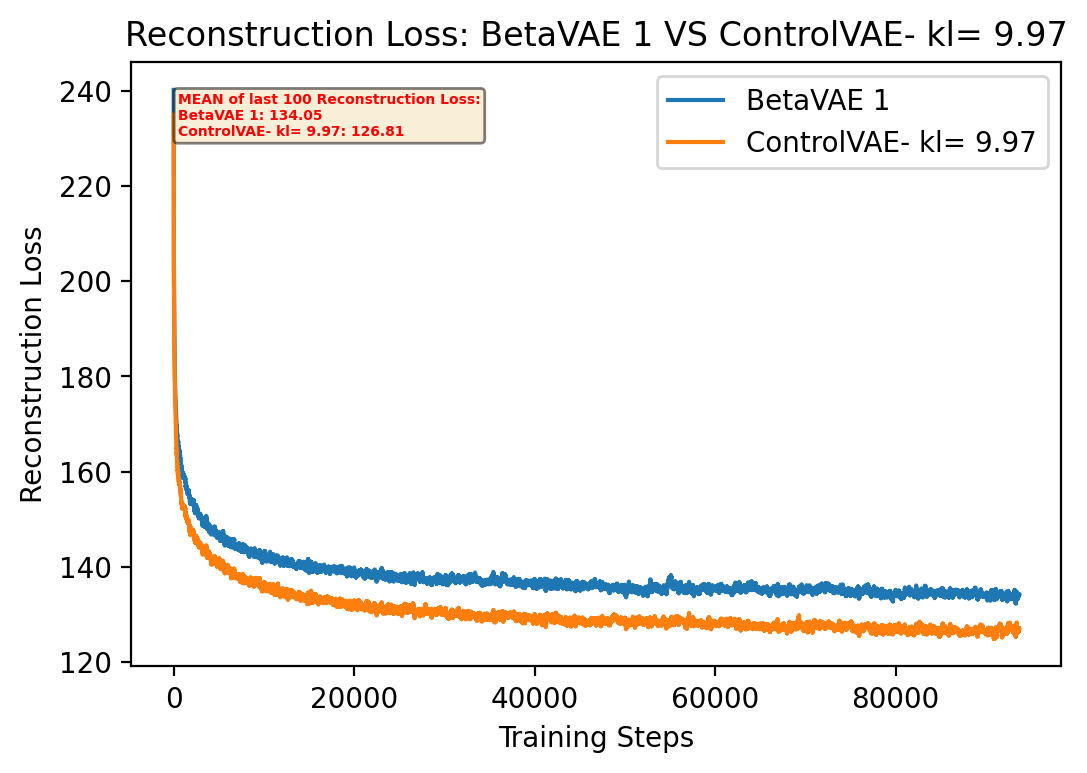

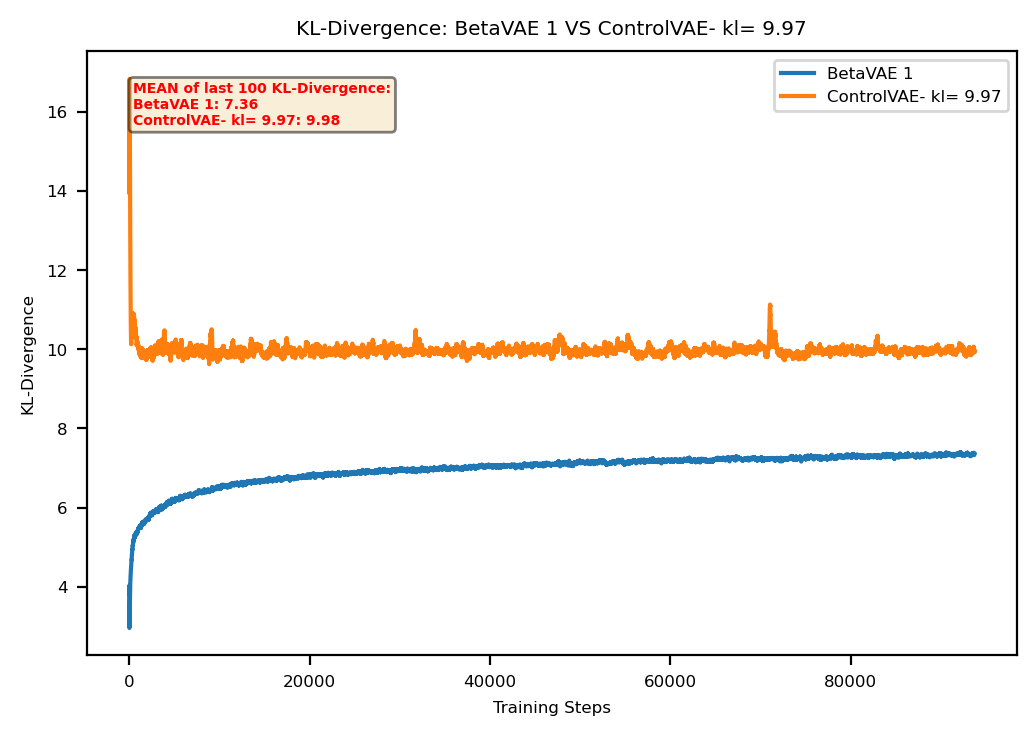

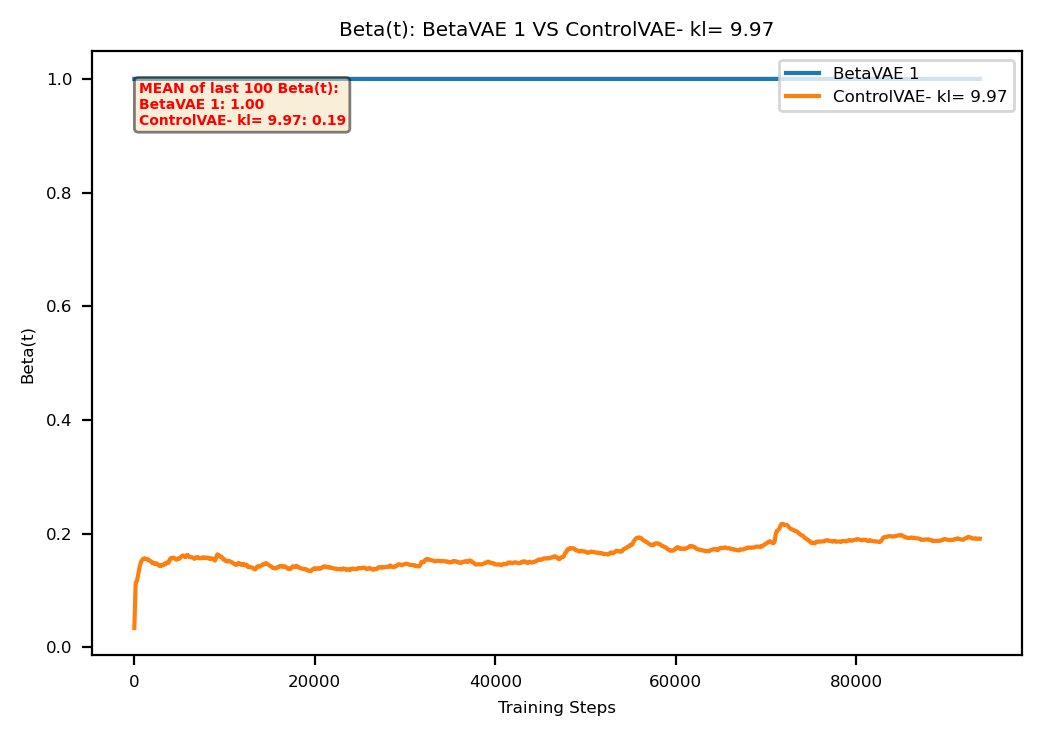

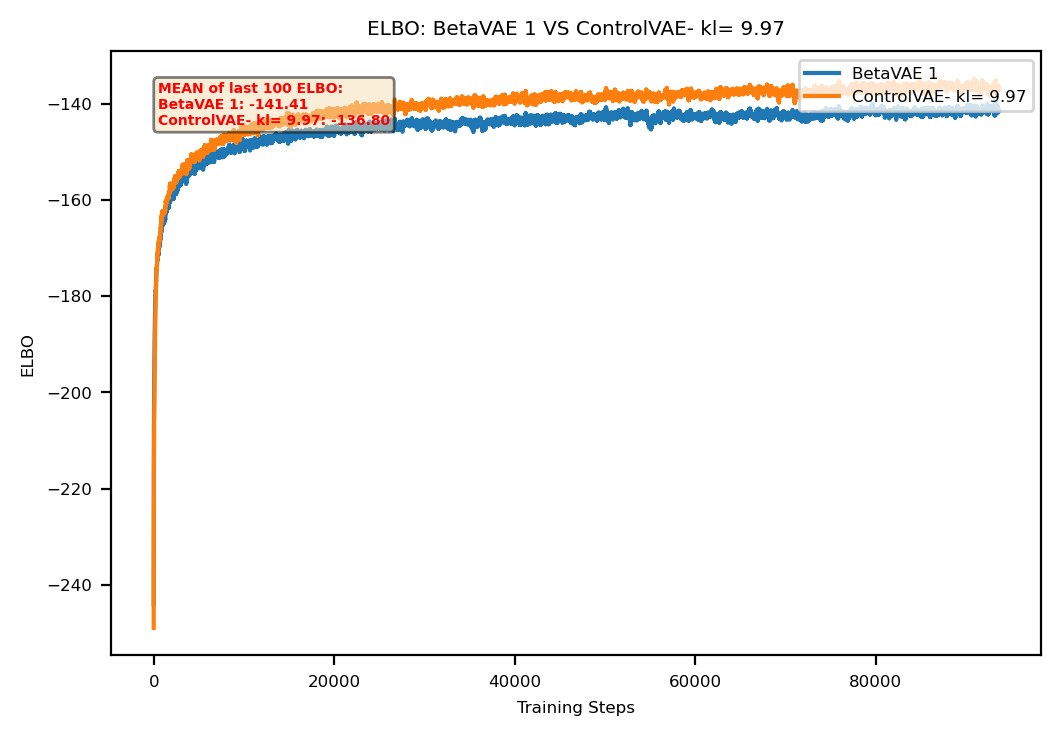

In [7]:
plot_comparison(model1, model2)